In [10]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

import seaborn as sns

In [2]:
df = pd.read_csv("../files/ab_testing.csv")

df.head()

,Fecha,Grupo,Ingresos
0,2024-01-01,Control,524.835708
1,2024-01-02,Control,493.086785
2,2024-01-03,Control,532.384427
3,2024-01-04,Control,576.151493
4,2024-01-05,Control,488.292331


In [3]:
df.tail()

,Fecha,Grupo,Ingresos
395,2024-07-14,Test,496.541217
396,2024-07-15,Test,434.343274
397,2024-07-16,Test,587.693619
398,2024-07-17,Test,514.273008
399,2024-07-18,Test,581.890816


In [4]:
df.shape

(400, 3)

In [5]:
df["Grupo"].unique()

array(['Control', 'Test'], dtype=object)

In [6]:
df.isna().sum()

Fecha       0
Grupo       0
Ingresos    0
dtype: int64

In [7]:
df.groupby("Grupo")["Ingresos"].mean()

Grupo
Control    497.961452
Test       524.293409
Name: Ingresos, dtype: float64

In [ ]:
# hacemos un histograma de la variable ingresos

In [ ]:
# gráfico de barras de ingresos y grupos

In [8]:
pd.crosstab(df["Grupo"], df["Ingresos"])

Ingresos,357.936633,369.012745,400.621554,402.016494,404.061439,404.335988,411.847992,413.754108,413.805214,418.742871,...,623.162106,624.619364,626.107810,626.651669,627.197204,627.659123,629.490147,635.732928,636.008458,712.636575
Grupo,,,,,,,,,,,,,,,,,,,,,
Control,0,1,1,1,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
Test,1,0,0,0,0,0,0,0,1,1,...,0,1,1,1,1,1,1,1,0,1


In [ ]:
# la tabla de contingencia no nos da información valiosa

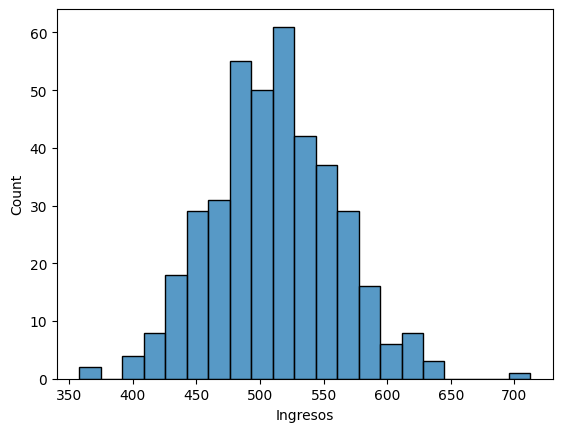

In [11]:
sns.histplot(x = "Ingresos", data = df);

In [14]:
import scipy.stats as stats

In [12]:
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")


In [15]:
normalidad(df, "Ingresos")

Para la columna Ingresos los datos siguen una distribución normal.


In [16]:
df.shape

(400, 3)

In [17]:
df.head()

,Fecha,Grupo,Ingresos
0,2024-01-01,Control,524.835708
1,2024-01-02,Control,493.086785
2,2024-01-03,Control,532.384427
3,2024-01-04,Control,576.151493
4,2024-01-05,Control,488.292331


In [18]:
grupo_control = df[df["Grupo"] == "Control"]["Ingresos"]
grupo_test = df[df["Grupo"] == "Test"]["Ingresos"]

Levene:

si p_value > 0.05 --> homogeneidad de varianzas

si p_value < 0.05 --> no homogeneidad

In [23]:
levene(grupo_control, grupo_test)

LeveneResult(statistic=np.float64(0.42502221374780874), pvalue=np.float64(0.5148179366456073))

In [ ]:
p_value = levene(grupo_control, grupo_test)[1]

In [19]:
_, p_value = levene(grupo_control, grupo_test)

print(p_value)

0.5148179366456073


In [25]:
def homogeneidad (dataframe, columna, columna_metrica):
    """
    Evalúa la homogeneidad de las varianzas entre grupos para una métrica específica en un DataFrame dado.
    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna que se utilizará para dividir los datos en grupos.
    - columna_metrica (str): El nombre de la columna que se utilizará para evaluar la homogeneidad de las varianzas.
    Returns:
    No devuelve nada directamente, pero imprime en la consola si las varianzas son homogéneas o no entre los grupos.
    Se utiliza la prueba de Levene para evaluar la homogeneidad de las varianzas. Si el valor p resultante es mayor que 0.05,
    se concluye que las varianzas son homogéneas; de lo contrario, se concluye que las varianzas no son homogéneas.
    """
    # lo primero que tenemos que hacer es crear tantos conjuntos de datos para cada una de las categorías que tenemos, Control Campaign y Test Campaign
    valores_evaluar = []
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])
    statistic, p_value = stats.levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")

In [26]:
homogeneidad(df, "Grupo", "Ingresos")

Para la métrica Ingresos las varianzas son homogéneas entre grupos.


In [24]:
# los datos son normales y la variable ingresos tiene homogeneidad de varianzas para las dos grupos


si p_value < 0.05 -> existe una diferencia significativa

si p_value > 0.05 -> no hay diferencia significativa

In [28]:
_, p_value = ttest_ind(grupo_control, grupo_test, equal_var=True)

print(p_value)

7.204966637152095e-08


In [29]:
p_value < 0.05

np.True_

Sí existe una diferencia significativa entre ambos grupos.

Comprobamos haciendo un groupby y vemos que el grupo Test ingresa más que el grupo Control

In [30]:
df.groupby("Grupo")["Ingresos"].mean()

Grupo
Control    497.961452
Test       524.293409
Name: Ingresos, dtype: float64

# segundo problema de A/B testing

In [31]:
df2 = pd.read_csv("../files/ab_testing_b.csv")

df2.head()

,Fecha,Grupo,Ingresos
0,2024-01-01,Control,84.845890
1,2024-01-02,Control,251.612387
2,2024-01-03,Control,418.361356
3,2024-01-04,Control,432.014263
4,2024-01-05,Control,287.634720


In [32]:
df2.shape

(400, 3)

In [33]:
df2.groupby("Grupo")["Ingresos"].mean()

Grupo
Control    472.077994
Test       573.848576
Name: Ingresos, dtype: float64

In [34]:
normalidad(df2, "Ingresos")

Para la columna Ingresos los datos no siguen una distribución normal.


In [ ]:
# ya que los datos no son normales, tenemos que hacer una prueba no paramétrica -> Mann Whitney

In [35]:
grupo_control = df2[df2["Grupo"] == "Control"]["Ingresos"]
grupo_test = df2[df2["Grupo"] == "Test"]["Ingresos"]

si p_value < 0.05 -> existe una diferencia significativa

si p_value > 0.05 -> no hay diferencia significativa

In [37]:
_, p_value = mannwhitneyu(grupo_control, grupo_test)

print(p_value)

0.00047439958834610726


In [38]:
p_value < 0.05

np.True_

In [ ]:
# existe una diferencia significativa

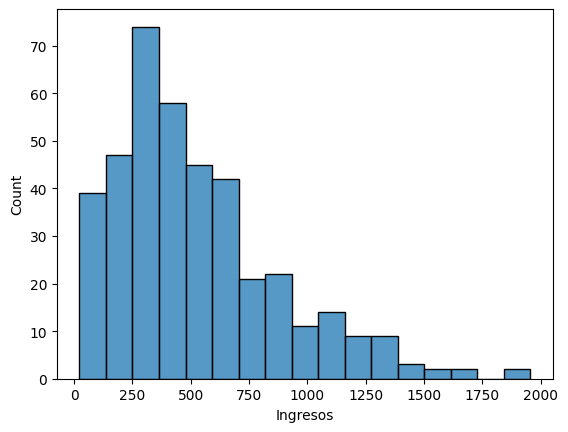

In [40]:
sns.histplot(x = "Ingresos", data = df2);

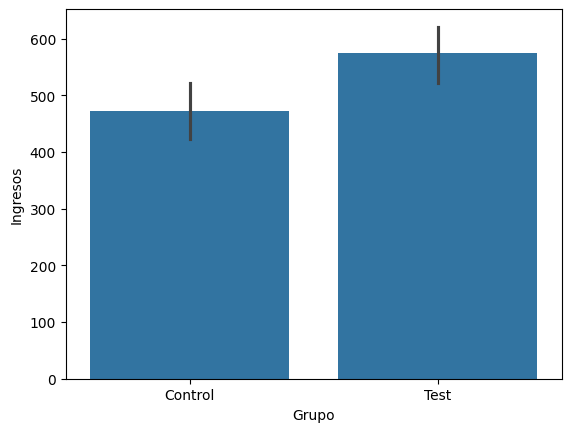

In [41]:
sns.barplot(x="Grupo", y="Ingresos", data = df2);

tercer problema de A/B testing

In [42]:
df3 = pd.read_csv("../files/ab_testing_c.csv")

df3.head()

,ID_Cliente,Grupo,HaComprado
0,1,Control,0
1,2,Control,1
2,3,Control,0
3,4,Control,0
4,5,Control,0


In [47]:
df3.tail()

,ID_Cliente,Grupo,HaComprado
995,996,Test,0
996,997,Test,1
997,998,Test,0
998,999,Test,1
999,1000,Test,0


En la columna HaComprado, 0 significa que NO ha comprado y 1 que SÏ ha comprado

In [43]:
df3.shape

(1000, 3)

In [44]:
df3["HaComprado"].unique()

array([0, 1])

In [45]:
df3["Grupo"].unique()

array(['Control', 'Test'], dtype=object)

In [51]:
tabla_cont = pd.crosstab(df3["Grupo"], df3["HaComprado"])

tabla_cont

HaComprado,0,1
Grupo,,
Control,417,83
Test,407,93


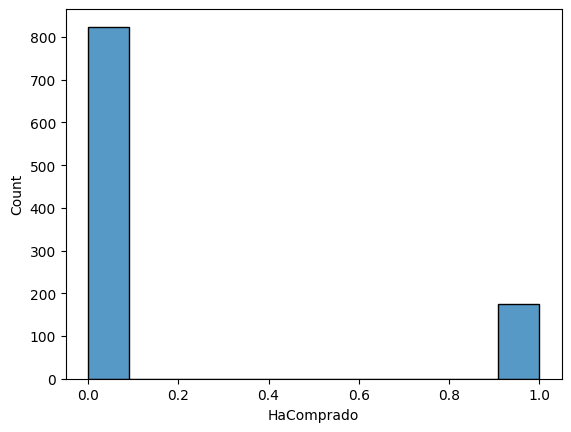

In [49]:
sns.histplot(x="HaComprado", data = df3);

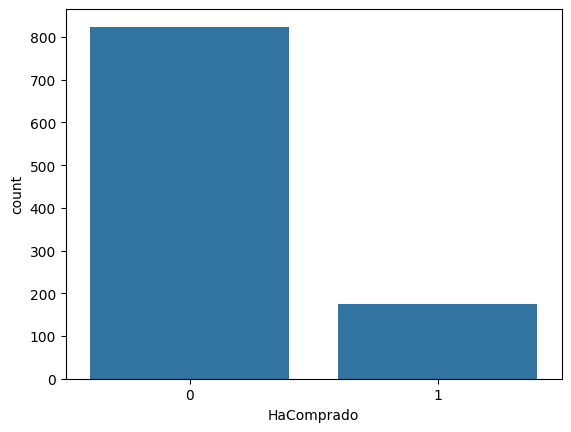

In [50]:
sns.countplot(x="HaComprado", data = df3);

In [54]:
_, p_value, _, _ = chi2_contingency(tabla_cont)

print(p_value)

0.4548538440764992


si p_value < 0.05 -> existe una diferencia significativa

si p_value > 0.05 -> no hay diferencia significativa

In [55]:
p_value < 0.05

np.False_

In [56]:
tabla_cont

HaComprado,0,1
Grupo,,
Control,417,83
Test,407,93


In [57]:
# después de realizar las pruebas de A/B testing, podemos decir que no existe una diferencia significativa entre los dos grupos